In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Reading the Dataset into python

In [2]:
wine_data = pd.read_csv("Wine.csv")
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_data.shape

(178, 13)

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Checking for null values : 

In [5]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

> No Null Values present in our Dataset

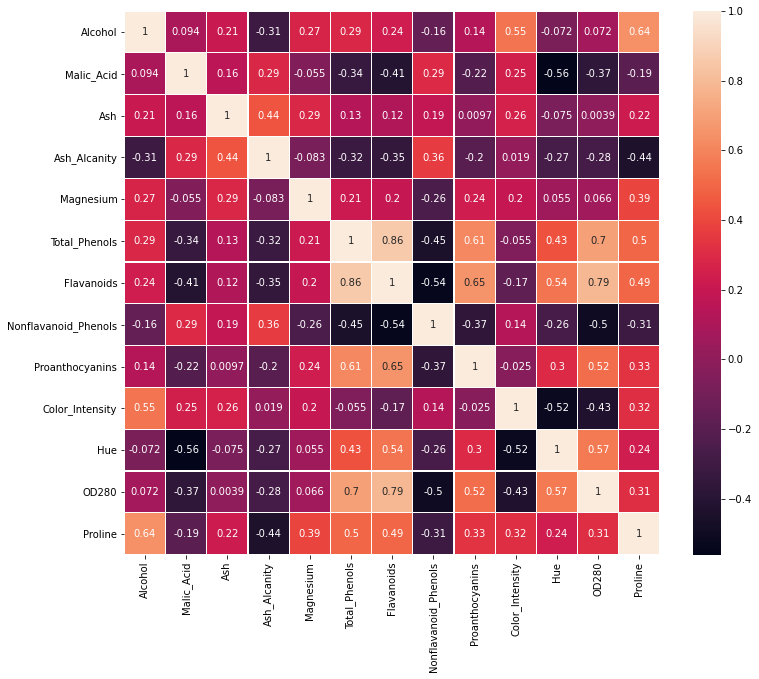

In [6]:
# Making a Correlation Matrix

corr = wine_data.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr, annot=True, linewidths=0.2);

In [7]:
###  Making the Boxplot of Original data set

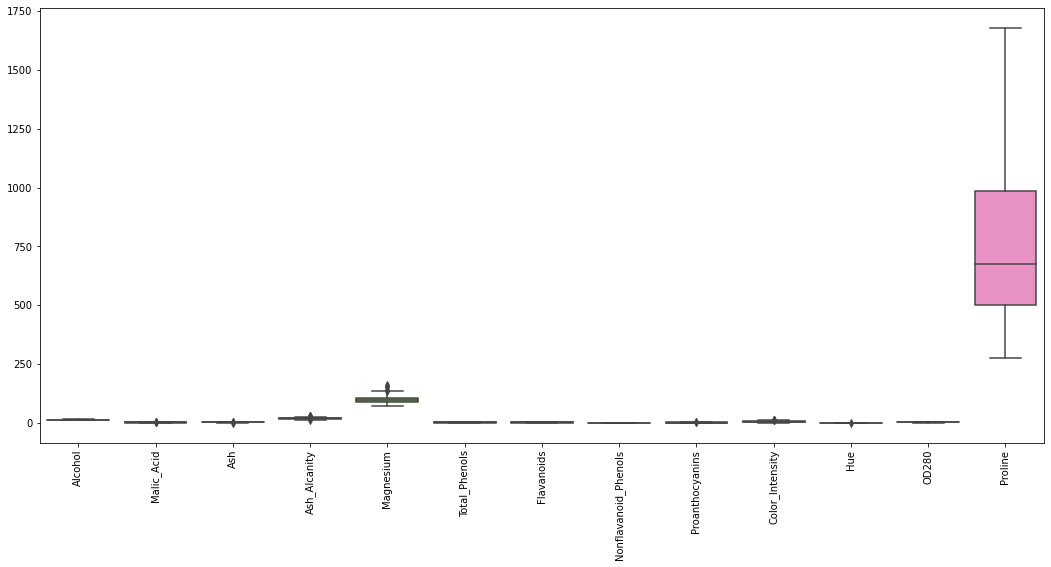

In [8]:
plt.figure(figsize=(18,8))
sns.boxplot(data= wine_data)
plt.xticks(rotation = 90);

Creating a **duplicate** of the original dataset.

In [9]:
# Creating a dupicate file

duplic_wine = wine_data.copy()
duplic_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Checking for outliers : 

* Checking for outliers in `Malic_Acid` Column :

<AxesSubplot:>

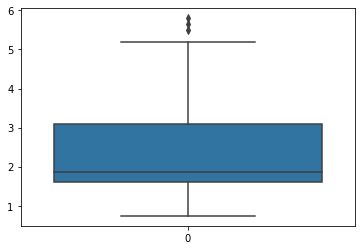

In [10]:
sns.boxplot(data = duplic_wine["Malic_Acid"])

In [11]:
Q1 = duplic_wine["Malic_Acid"].quantile(0.25)
Q2 = duplic_wine["Malic_Acid"].quantile(0.5)
Q3 = duplic_wine["Malic_Acid"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Malic_Acid"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Malic_Acid"] > u_limit) | (duplic_wine["Malic_Acid"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  1.6025
The second quartile is :  1.8650000000000002
The third quartile is :  3.0825

The IQR is :  1.48

The upper limit =  5.3025
The lower limit =  -0.6174999999999997

The outlier values are : [5.8, 5.51, 5.65]

The outlier indexs are : Int64Index([123, 137, 173], dtype='int64')


(175, 13)

<AxesSubplot:>

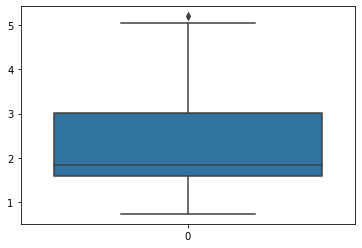

In [12]:
sns.boxplot(data = duplic_wine["Malic_Acid"])

> * Checking for Outliers in `Ash` Feature :

<AxesSubplot:>

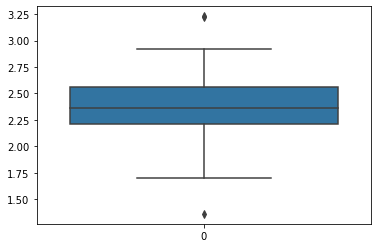

In [13]:
sns.boxplot(data = wine_data["Ash"])

In [14]:
Q1 = duplic_wine["Ash"].quantile(0.25)
Q2 = duplic_wine["Ash"].quantile(0.5)
Q3 = duplic_wine["Ash"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Ash"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Ash"] > u_limit) | (duplic_wine["Ash"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  2.21
The second quartile is :  2.36
The third quartile is :  2.5549999999999997

The IQR is :  0.34499999999999975

The upper limit =  3.0724999999999993
The lower limit =  1.6925000000000003

The outlier values are : [3.22, 1.36, 3.23]

The outlier indexs are : Int64Index([25, 59, 121], dtype='int64')


(172, 13)

<AxesSubplot:>

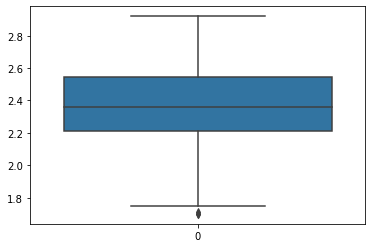

In [15]:
sns.boxplot(data = duplic_wine["Ash"])

> * Checking for ouliers in `Ash_Alcanity` Feature :

<AxesSubplot:>

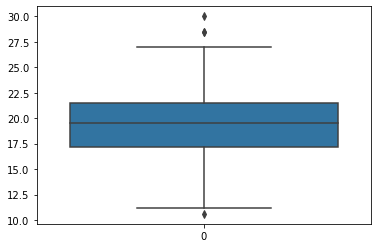

In [16]:
sns.boxplot(data = wine_data["Ash_Alcanity"])

In [17]:
Q1 = duplic_wine["Ash_Alcanity"].quantile(0.25)
Q2 = duplic_wine["Ash_Alcanity"].quantile(0.5)
Q3 = duplic_wine["Ash_Alcanity"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Ash_Alcanity"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Ash_Alcanity"] > u_limit) | (duplic_wine["Ash_Alcanity"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  17.175
The second quartile is :  19.25
The third quartile is :  21.5

The IQR is :  4.324999999999999

The upper limit =  27.987499999999997
The lower limit =  10.687500000000002

The outlier values are : [30.0, 28.5]

The outlier indexs are : Int64Index([73, 127], dtype='int64')


(170, 13)

<AxesSubplot:>

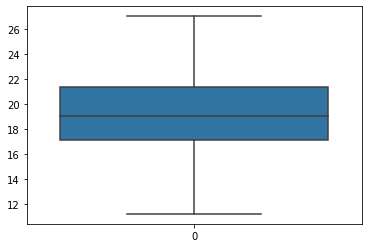

In [18]:
sns.boxplot(data = duplic_wine["Ash_Alcanity"])

> * Checking for outliers in `Magnesium` Feature : 

<AxesSubplot:>

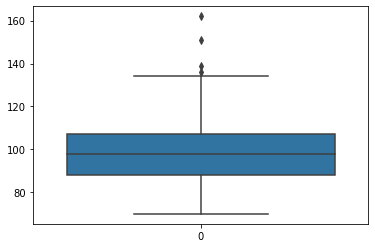

In [19]:
sns.boxplot(data = wine_data["Magnesium"])

In [20]:
Q1 = duplic_wine["Magnesium"].quantile(0.25)
Q2 = duplic_wine["Magnesium"].quantile(0.5)
Q3 = duplic_wine["Magnesium"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Magnesium"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Magnesium"] > u_limit) | (duplic_wine["Magnesium"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  88.0
The second quartile is :  98.0
The third quartile is :  107.0

The IQR is :  19.0

The upper limit =  135.5
The lower limit =  59.5

The outlier values are : [151, 136, 162]

The outlier indexs are : Int64Index([69, 78, 95], dtype='int64')


(167, 13)

<AxesSubplot:>

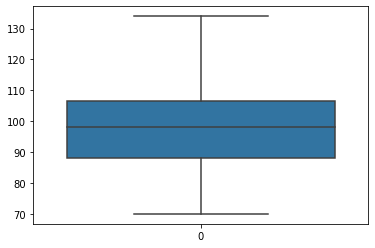

In [21]:
sns.boxplot(data = duplic_wine["Magnesium"])

> * Checking for outliers in ` Proanthocyanins ` feature : `

<AxesSubplot:>

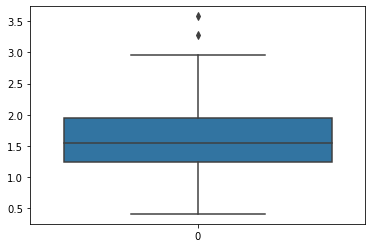

In [22]:
sns.boxplot(data = wine_data["Proanthocyanins"])

In [23]:
Q1 = duplic_wine["Proanthocyanins"].quantile(0.25)
Q2 = duplic_wine["Proanthocyanins"].quantile(0.5)
Q3 = duplic_wine["Proanthocyanins"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Proanthocyanins"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Proanthocyanins"] > u_limit) | (duplic_wine["Proanthocyanins"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  1.25
The second quartile is :  1.54
The third quartile is :  1.9249999999999998

The IQR is :  0.6749999999999998

The upper limit =  2.9374999999999996
The lower limit =  0.23750000000000027

The outlier values are : [2.96, 3.58]

The outlier indexs are : Int64Index([14, 110], dtype='int64')


(165, 13)

<AxesSubplot:>

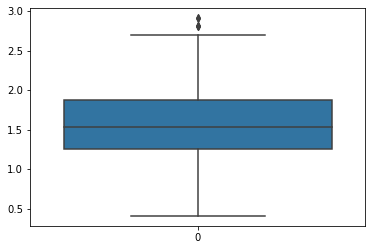

In [24]:
sns.boxplot(data = duplic_wine["Proanthocyanins"])

> * Checking for the outliers in `Color_Intensity` feature : 

<AxesSubplot:>

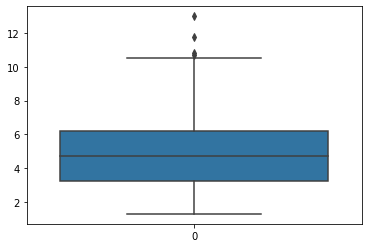

In [25]:
sns.boxplot(data = wine_data["Color_Intensity"])

In [26]:
Q1 = duplic_wine["Color_Intensity"].quantile(0.25)
Q2 = duplic_wine["Color_Intensity"].quantile(0.5)
Q3 = duplic_wine["Color_Intensity"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Color_Intensity"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Color_Intensity"] > u_limit) | (duplic_wine["Color_Intensity"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  3.27
The second quartile is :  4.8
The third quartile is :  6.25

The IQR is :  2.98

The upper limit =  10.719999999999999
The lower limit =  -1.1999999999999997

The outlier values are : [10.8, 13.0, 11.75]

The outlier indexs are : Int64Index([151, 158, 159], dtype='int64')


(162, 13)

<AxesSubplot:>

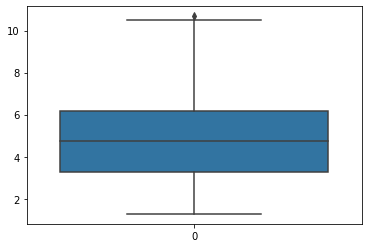

In [27]:
sns.boxplot(data = duplic_wine["Color_Intensity"])

> * Checking for outliers in `Hue` feature : 

<AxesSubplot:>

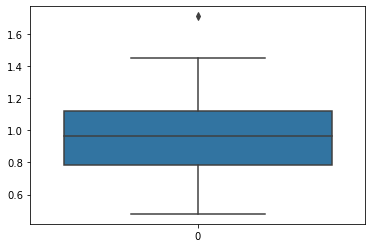

In [28]:
sns.boxplot(data = wine_data["Hue"])

In [29]:
Q1 = duplic_wine["Hue"].quantile(0.25)
Q2 = duplic_wine["Hue"].quantile(0.5)
Q3 = duplic_wine["Hue"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Hue"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Hue"] > u_limit) | (duplic_wine["Hue"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  0.7925
The second quartile is :  0.97
The third quartile is :  1.12

The IQR is :  0.3275000000000001

The upper limit =  1.6112500000000003
The lower limit =  0.3012499999999998

The outlier values are : [1.71]

The outlier indexs are : Int64Index([115], dtype='int64')


(161, 13)

<AxesSubplot:>

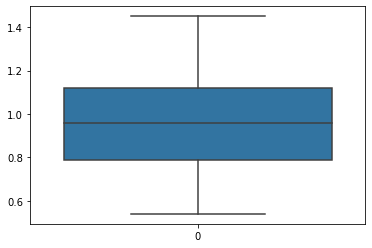

In [30]:
sns.boxplot(data = duplic_wine["Hue"])

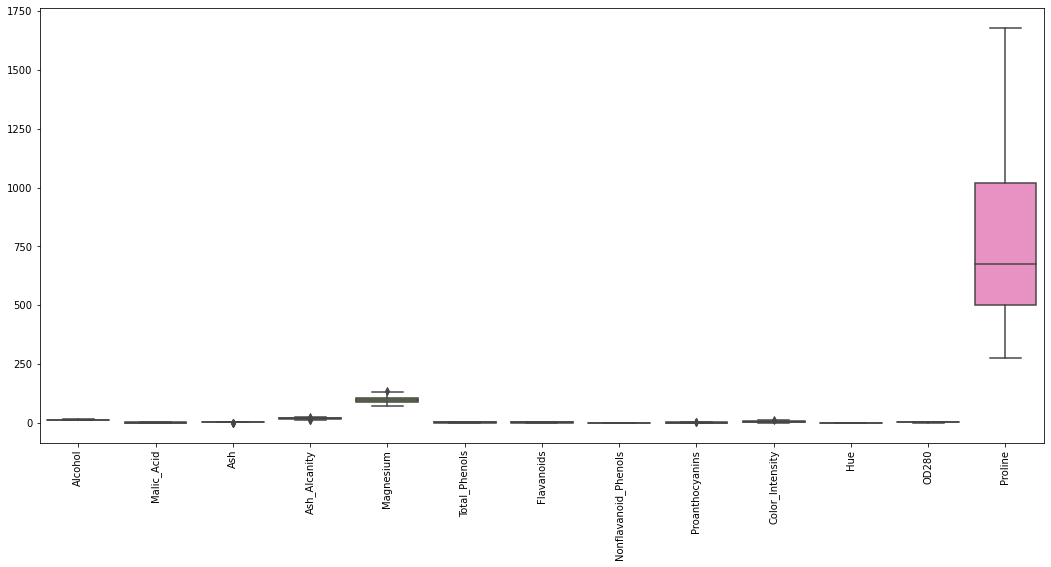

In [31]:
plt.figure(figsize=(18,8))
sns.boxplot(data= duplic_wine)
plt.xticks(rotation = 90);

> Now we have treated all the outliers present in our dataset.

In [32]:
duplic_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000


### We can see that the scales are varying for different parameters, so we'll try standard scaling and normalizing our data first

In [33]:
# Creating 2 duplicates of the outlier removed data.

dup_stdscaled = duplic_wine.copy()

dup_norm = duplic_wine.copy()

Making a Standard scaled Dataset :

In [34]:
#### Standard scaling our dataset.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_data = ss.fit_transform(dup_stdscaled)

pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02
mean,3.082420e-15,-1.130910e-16,8.936951e-16,-7.033711e-17,-2.770386e-16,1.999781e-17,-5.047722e-16,-3.020358e-16,-4.585704e-17,2.358362e-16,9.336907e-16,-8.137038e-17,-2.965192e-17
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00
min,-2.059161e+00,-1.502862e+00,-2.755979e+00,-2.732175e+00,-2.312593e+00,-2.074034e+00,-1.724192e+00,-1.885730e+00,-2.203572e+00,-1.747222e+00,-1.924002e+00,-1.898052e+00,-1.501825e+00
25%,-8.423697e-01,-6.743920e-01,-5.583556e-01,-7.084969e-01,-8.566089e-01,-9.257223e-01,-8.451773e-01,-7.329132e-01,-5.832379e-01,-8.209962e-01,-7.703344e-01,-8.716036e-01,-7.948163e-01
50%,4.487390e-02,-4.363261e-01,-1.931581e-02,-1.013934e-01,-4.772894e-02,6.310167e-02,1.053853e-01,-1.565048e-01,-1.147075e-01,-1.088726e-01,1.415929e-02,2.251497e-01,-2.487783e-01
75%,8.307182e-01,7.444810e-01,7.270469e-01,5.731660e-01,5.993751e-01,8.286428e-01,8.924102e-01,5.845916e-01,6.466544e-01,5.427439e-01,7.525063e-01,7.875873e-01,8.401414e-01
max,2.275658e+00,2.734712e+00,2.302702e+00,2.596844e+00,2.864239e+00,2.551110e+00,1.945184e+00,2.478505e+00,2.676953e+00,2.627916e+00,2.275347e+00,1.940584e+00,2.923292e+00


Making a Normalized dataset :

In [35]:
#### Normalizing our Data

from sklearn.preprocessing import Normalizer

norm = Normalizer()
norm_data = norm.fit_transform(dup_norm)

pd.DataFrame(norm_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,0.019901,0.003643,0.003620,0.030667,0.149208,0.003396,0.002937,0.000573,0.002307,0.007234,0.001471,0.003983,0.986361
std,0.007458,0.002338,0.001403,0.014559,0.054661,0.001545,0.001724,0.000324,0.001201,0.003520,0.000733,0.001999,0.010238
min,0.008428,0.000944,0.001473,0.009800,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013438,0.001687,0.002353,0.017452,0.104447,0.002376,0.001742,0.000276,0.001468,0.004708,0.000969,0.002521,0.982112
50%,0.018566,0.003196,0.003437,0.029500,0.143578,0.002916,0.002724,0.000511,0.001970,0.005984,0.001192,0.003381,0.988987
75%,0.024834,0.004940,0.004466,0.039810,0.180956,0.003795,0.003549,0.000834,0.002779,0.008564,0.001827,0.004866,0.994260
max,0.041106,0.011903,0.007305,0.069703,0.297958,0.008404,0.008671,0.002008,0.007469,0.020690,0.004727,0.010858,0.997835


Now we have both the `Standardized` as well as the `normalized` data seperately for our model making.

# 2.) Trying out different clustering models in the wine dataset. : 

## 1.) Making a K-Means Model 

###  Finding the Optimum number of Clusters

* Using Elbow method to find the optimum clusters for both the dataset.

In [36]:
from sklearn.cluster import KMeans

# Using Scaled data

inertia = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
    
print(inertia)

C:\Users\101me\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2092.999999999999, 1453.2302460891567, 1080.418730392, 1001.0061348545388, 940.1886851022987, 884.9787299105392, 860.7188238151482, 798.0191180759131, 765.6852216618523]


Text(0, 0.5, 'Inertia')

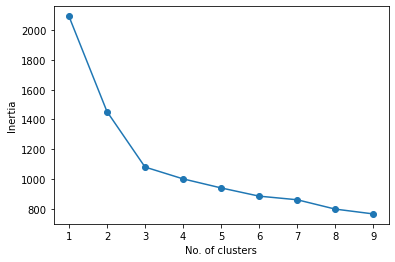

In [37]:
plt.plot(range(1,10),inertia,'-o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")

> We can take **3** or **4** as the optimum number for cluster for scaled data.

C:\Users\101me\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.5426354172490375, 0.19166107751849618, 0.09074482812553744, 0.05062937842266653, 0.032495786635622234, 0.024968024608848085, 0.020876047762441775, 0.018576677014670747, 0.015823462024514907]


Text(0, 0.5, 'Inertia')

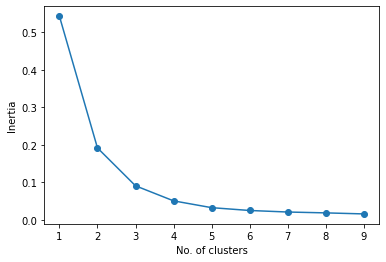

In [38]:
# Using Normalized data

inertia_n = []
for k in range(1,10):
    model_n = KMeans(n_clusters=k)
    model_n.fit(norm_data)
    inertia_n.append(model_n.inertia_)
    
print(inertia_n)

plt.plot(range(1,10),inertia_n,'-o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")

> We can take **3** or **4** as the optimum cluster

Next we create a model based on the optimum clusters for both the datasets and choose the best one.

#### Creating KMeans Model for `Scaled data`

In [39]:
# Creating a model with 3 optimum clusters on scaled data

kmeans_s = KMeans(n_clusters=3)
kmeans_s.fit(scaled_data)
label_s = kmeans_s.predict(scaled_data)
print(label_s)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
# Creating a model with 4 optimum cluster on scaled data.

kmeans_s1 = KMeans(n_clusters=4)
kmeans_s1.fit(scaled_data)
label_s1 = kmeans_s1.predict(scaled_data)
print(label_s1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 3 3 1 1 3 1 3 1 3 1 3
 3 3 1 2 3 3 1 1 1 1 1 1 1 3 3 1 3 3 3 3 1 3 3 3 1 3 1 3 3 3 1 1 1 3 3 1 3
 3 1 3 3 3 3 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [41]:
from sklearn.metrics import silhouette_score

In [42]:
# Checking the silhouette_score of both models

print(f'Silhouette Score(n=3): {silhouette_score(scaled_data, label_s)}')

print(f'\nSilhouette Score(n=4): {silhouette_score(scaled_data, label_s1)}')

Silhouette Score(n=3): 0.3013979201701521

Silhouette Score(n=4): 0.24597890962851576


> *We observe that For `n = 3` (scaled data) , we get a better silhouette_score on scaled data.*

#### Creating a model for `Normalized data`

In [43]:
# using n = 3

kmeans_n = KMeans(n_clusters=3)
kmeans_n.fit(norm_data)
label_n = kmeans_n.predict(norm_data)
print(label_n)

[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 0 0 0 0 2 1 0 2 1 1 1 1
 1 2 0 0 0 1 0 0 2 2 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 1 1 1 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:
# using n = 4,

kmeans_n1 = KMeans(n_clusters=4)
kmeans_n1.fit(norm_data)
label_n1 = kmeans_n1.predict(norm_data)
print(label_n1)

[0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 3 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 1 3 1 2 3 3 3 3 0 1 1 0 1 1 1 1
 2 3 3 3 1 1 1 3 3 0 3 1 3 2 2 1 1 3 1 3 3 1 1 3 2 3 1 2 3 2 3 1 1 1 2 1 3
 3 2 1 1 2 2 3 1 1 1 1 3 3 3 3 1 3 0 1 3 3 3 1 3 3 1 2 2 3 3 3 1 0 3 3 1 3
 3 3 3 3 3 1 1 1 3 3 3 3 1]


In [45]:
# Checking the silhouette_score of both models

print(f'Silhouette Score(n=3): {silhouette_score(norm_data, label_n)}')

print(f'\nSilhouette Score(n=4): {silhouette_score(norm_data, label_n1)}')

Silhouette Score(n=3): 0.5348566886642946

Silhouette Score(n=4): 0.5254475524052948


*We observe that for **n = 3**, we get a better Silhouette score*



> **Hence we can use the `Normalized data` with `3 Clusters` for our KMeans Model.**

### Next performing PCA on the data to see if it can improve the performance.

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(0.99)

norm_pca = pca.fit_transform(norm_data)

norm_pca.shape

(161, 2)

> PCA has reduced our feature count to 2.

In [48]:
pca.explained_variance_ratio_

array([0.98140446, 0.01066812])

In [49]:
kmeans_pca_n = KMeans(n_clusters=3)
kmeans_pca_n.fit(norm_pca)
label_pca_n = kmeans_pca_n.predict(norm_pca)

print(label_pca_n)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 2 2 2 2 0 1 2 0 1 1 1 1
 1 0 2 2 2 1 2 2 0 0 2 2 2 1 1 1 2 2 1 2 2 1 1 2 1 2 2 1 2 1 2 1 1 2 1 1 2
 2 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 1 1 1 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [50]:
print(f'Silhouette Score(n=3): {silhouette_score(norm_pca, label_pca_n)}')

Silhouette Score(n=3): 0.547624304350469


> After examing we can see that our model score (after PCA) imporved slightly from the previous score.

> * Previously we had a `silhouette_score` of **0.535** and after PCA it increased to **0.548**.

## 2.) Creating a Agglomerative Hierarchical model (AHC)

> Just like before we'll create a model each for our scaled and Normalised data and choose the best of those.

### Finding the optimum number of clusters.

We'll first create a Dendrogram to find the optimum number of clusters.

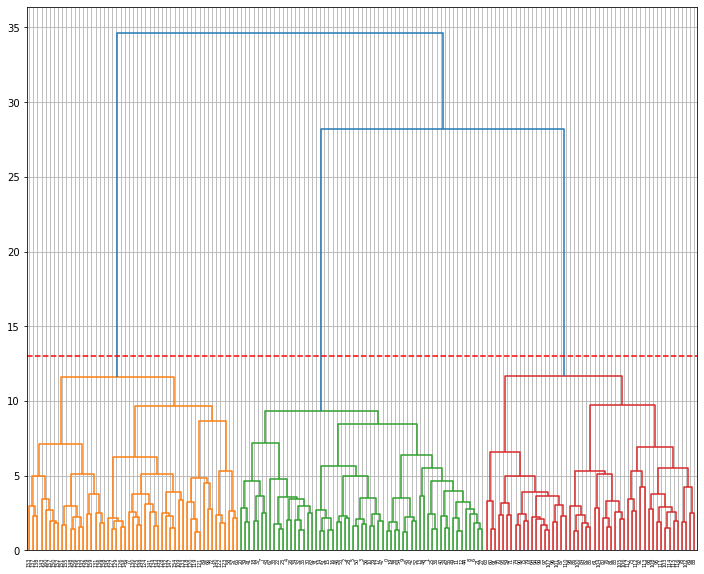

In [51]:

from scipy.cluster.hierarchy import dendrogram,linkage

# For scaled data

linked = linkage(scaled_data, method = "ward")

plt.figure(figsize=(12,10))
dendrogram(linked,orientation="top",distance_sort="ascending", show_leaf_counts=True)
plt.hlines(13,0,5000,colors="r",linestyles="dashed")
plt.grid()
plt.show();

From the above we can take **3** as the optimum number of clusters for the `Scaled data.`

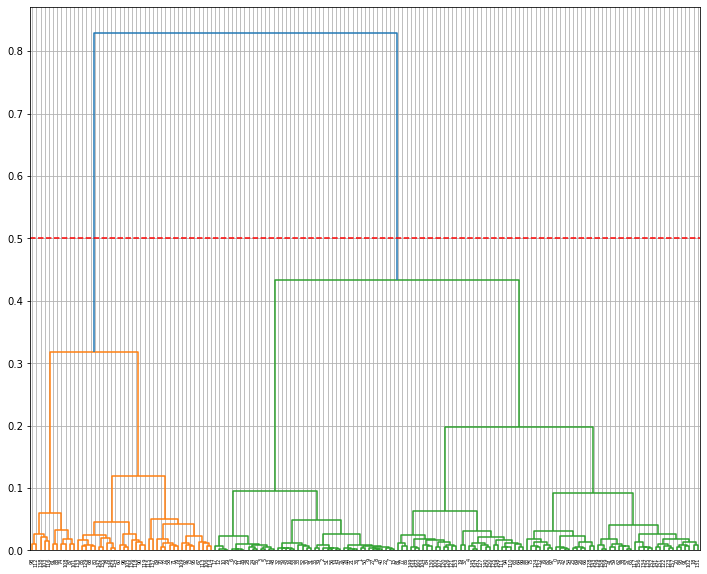

In [52]:
# For Normalised data

linked1 = linkage(norm_data, method = "ward")

plt.figure(figsize=(12,10))
dendrogram(linked1,orientation="top",distance_sort="ascending", show_leaf_counts=True)
plt.hlines(0.5,0,5000,colors="r",linestyles="dashed")
plt.grid()
plt.show();

For the `Normalised data` we can take **2** as the optimum number of clusters.

#### Creating an AHC Model for `Scaled data`

In [53]:
from sklearn.cluster import AgglomerativeClustering

#  Making AHC Model for Scale data 

ahc_s = AgglomerativeClustering(n_clusters = 3, affinity="euclidean", linkage="ward")
y_ahc_s = ahc_s.fit_predict(scaled_data)

print(y_ahc_s)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 2 0 0 1 1 2 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [54]:
print(f'Silhouette Score(n=3): {silhouette_score(scaled_data, y_ahc_s)}')

Silhouette Score(n=3): 0.29574004115878627


#### Making an  AHC Model for `Normalized data`

In [55]:
# Making AHC Model for Normalized data

ahc_n = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
y_ahc_n = ahc_n.fit_predict(norm_data)

print(y_ahc_n)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0
 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0]


In [56]:
print(f'Silhouette Score(n=2): {silhouette_score(norm_data, y_ahc_n)}')

Silhouette Score(n=2): 0.5572893804814139


#### 
*After comparing both the AHC models we can say that a Model created with normalized data is giving us a better result compared to a Standard scaled data.*

### Using the PCA to see if we are getting any improvement in performance

> Since we've already done a PCA for our normalized data we'll use the same and make the model.

In [57]:

ahc_pca_n = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
y_ahc_pca = ahc_pca_n.fit_predict(norm_pca)

print(y_ahc_pca)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 1 1 0 0 0 0 1]


In [58]:
print(f'Silhouette Score(n=2): {silhouette_score(norm_pca, y_ahc_pca)}')

Silhouette Score(n=2): 0.5585213370918147


> We can observe a `very minor increase` in our Silhouette Score. Increased from 0.557 to 0.559

#### 

## Conclusion : 

* After comparing both our models we can say that the `Agglomerative Hierarchical Clustering model` (Normalized) is giving a **slightly higher** performance score than the `K-Means model` (After PCA) at identifying Clusters.

> The Silhouette score for the Models were as given below :
> * `KMeans Model` (After PCA and n = 3) = **0.55**,
> * `AHC Model` (After PCA and n = 2 ) = **0.56**